## Linear Regression

* Linear Regression is a statistical technique used to find the relationship between variables
* In ML context, linear regression finds the relationship between features and a label
* In algebraic terms, the model is defined as y = mx + b
    * y is the value we want to predict
    * m is the slope of the line
    * x is the input value
    * b is the y-intercept
* In ML terms, the model is defined as y' = b + w1*x1
    * y' is the predicted value
    * b is the bias term
    * w1 is the weight for feature x1
    * x1 is the input value

<img src="../pics/linear-equation.png" alt="Mathematical representation of a linear model" width="550"/>

* A more sophisticated model can be defined as y' = b + w1*x1 + w2*x2 + ... + wn*xn
    * y' is the predicted value
    * b is the bias term
    * w1, w2, ..., wn are the weights for features x1, x2, ..., xn
    * x1, x2, ..., xn are the input values

### Linear Regression: Loss

* Loss is a numerical metric the predicts how wrong a model's predictions are
* The goal of training a model is to minimize the loss
* Loss focuses on the distances between the values, not the direction
* Four main types of loss in linear regression:
    1. L1 loss
        * The sum of the absolute values of the difference between the predicted and actual values
        * $\sum |actual value - predicted value|$
    2. Mean Absolute Error
        * The average of L1 losses across a set of *N* examples
        * $\frac{1}{N}\sum |actual value - predicted value|$
    3. L2 loss
        * The sum of the squared differences between the predicted and actual values
        * $\sum (actual value - predicted value)^2$
    4. Mean Squared Error
        * The average of L2 losses across a set of *N* examples
        * $\frac{1}{N}\sum (actual value - predicted value)^2$
* When processing multiple examples at once, MAE or MSE is preferred
* When choosing the best loss function, consider how you want the model to treat outliers
    * MSE moves the model toward outliers

### Gradient Descent

* Gradient descent is a mathematical technique that iteratively finds the weights and bias that produce the model with the lowest loss
* Process of gradient descent"
    1. Calculate the loss with the current weight and bias
    2. Determine the direction to move the weights and bias that reduce loss
    3. Move the weight and bias values a small amount in the direction that reduces loss
    4. Repeat steps 1-3 until the loss stops decreasing

<img src="../pics/loss-process.png" alt="Gradient descent is an interative process" width="550"/>

### Hyperparameters

* Hyperparameters are variables that control different aspects of training
* Learning rate is a floating point number that influences how quickly the model converges
    * If learning rate is too low, model takes too long to converge
    * If learning rate is too high, the model bounces around the weights and bias that minimize the loss and never converges
* Learning rate determines that magnitude of the changes to make to the weights and bias during each step of gradient descent
    * Gradient multiplied by learning rate to determine parameters for the next iteration
* Batch size refers to the number of examples the model processes before updating its weights and bias
* Stochastic gradient descent uses only a single example per iteration
    * This one example is chosen at random
    * Works given enough iterations, but can be noisy
* Mini-batch stochastic gradient descent is between SGD and full-batch gradient descent
    * Uses a small number of examples per iteration
    * Reduces noise while still being efficient
* Epoch means the model has processed all examples in the training set once
* Number of epochs is the number of times the model processes all examples in the training set
    * Given a training set with 1,000 examples and a batch size of 100, the model will take 10 iterations to complete one epoch
    

### Programming Exercise

In [21]:
# Load libraries
# Data libs
import numpy as np
import pandas as pd

# ML libs
import keras
import ml_edu.experiment
import ml_edu.results

# Data Viz libs
import plotly.express as px

In [7]:
# Fix location
import os 
os.getcwd()
os.chdir('..')

In [8]:
# Dataset load
chicago_taxi_dataset = pd.read_csv('ml-crash-course/datasets/chicago_taxi_train.csv')

# Update dataframe to use specific columns
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]
training_df.head(200)

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [9]:
# View dataset statistics
training_df.describe(include='all')

# View correlation matrix
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [10]:
# View pairplot
px.scatter_matrix(training_df, dimensions = ['FARE', 'TRIP_MILES', 'TRIP_SECONDS'])

In [11]:
# Define the model
def create_model(
        settings: ml_edu.experiment.ExperimentSettings,
        metrics: list[keras.metrics.Metric],
) -> keras.Model:
    """Create and compile a simple linear regression model."""
    # First describe the topography mile
    # For simple linear regression, the topography is a single node in a single layer
    inputs = {name: keras.Input(shape = (1, ), name = name) for name in settings.input_features}
    concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
    outputs = keras.layers.Dense(units = 1)(concatenated_inputs)
    model = keras.Model(inputs = inputs, outputs = outputs)

    # Compile the model topography into code that Keras can efficiently execute
    # Configure training to minimize mean squared error
    model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = settings.learning_rate),
                  loss = 'mean_squared_error',
                  metrics = metrics)

    return model

def train_model(
        experiment_name: str,
        model: keras.Model,
        dataset: pd.DataFrame,
        label_name: str,
        settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
    """Train the model by feeding it data."""
    # Feed the model the feature and the label
    # The model will train for the specified number of epochs
    features = {name: dataset[name].values for name in settings.input_features}
    label = dataset[label_name].values
    history = model.fit(x = features,
                        y = label,
                        batch_size = settings.batch_size,
                        epochs = settings.number_epochs)
    
    return ml_edu.experiment.Experiment(
        name = experiment_name,
        settings = settings,
        model = model,
        epochs = history.epoch,
        metrics_history = pd.DataFrame(history.history),
    )

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 131.8295 - rmse: 11.4817
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 34.3451 - rmse: 5.8605
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.3098 - rmse: 4.3943
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.7084 - rmse: 4.2081
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.4277 - rmse: 4.0531
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.4841 - rmse: 3.9350
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8153 - rmse: 3.8491
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.4161 - rmse: 3.7968
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2071 - rmse: 3.7692
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1031 - rmse: 3.7554
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0561 - rmse: 3.7491
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0401 - rmse: 3.7470

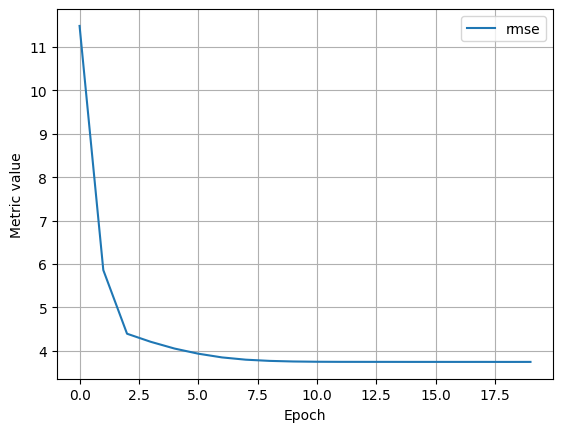

In [12]:
# First experiment - number of miles
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name = 'rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48.4273 - rmse: 6.9590
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.2321 - rmse: 6.9449
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.6900 - rmse: 6.9058
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47.9599 - rmse: 6.9253
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 48.0296 - rmse: 6.9303
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.4156 - rmse: 6.8859
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 48.9957 - rmse: 6.9997
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.0072 - rmse: 6.9287
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.7051 - rmse: 6.9069
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.8181 - rmse: 6.9151
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.2384 - rmse: 6.9454
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.1009 - rmse: 6.9355
E

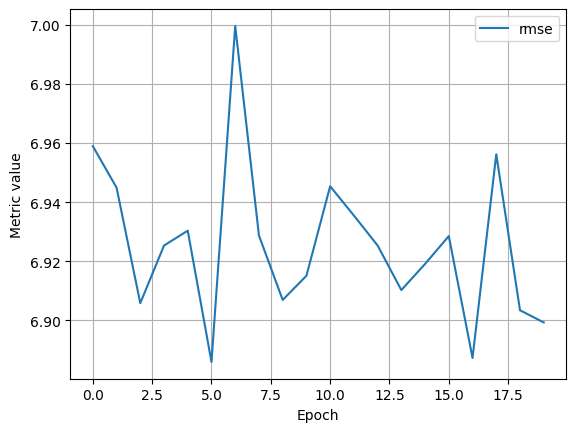

In [14]:
# Try with learning rate at 1, 0.0001, and batch size of 500
settings_2_a = ml_edu.experiment.ExperimentSettings(
    learning_rate = 1.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2_a, metrics)

experiment_2 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2_a)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

When the learning rate is too high, the loss curve bounces around and does not appear to be moving towards convergence with each iteration. Also, notice that the predicted model does not fit the data very well. With a learning rate that is too high, it is unlikely that you will be able to train a model with good results.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1232.6136 - rmse: 35.1086
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1182.0674 - rmse: 34.3812
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1132.6122 - rmse: 33.6543
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1084.2152 - rmse: 32.9274
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1036.6970 - rmse: 32.1978
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 990.4783 - rmse: 31.4719 
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 945.3642 - rmse: 30.7468
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 901.3405 - rmse: 30.0223
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 858.0473 - rmse: 29.2924
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 816.0688 - rmse: 28.5669
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 775.1144 - rmse: 27.8409
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

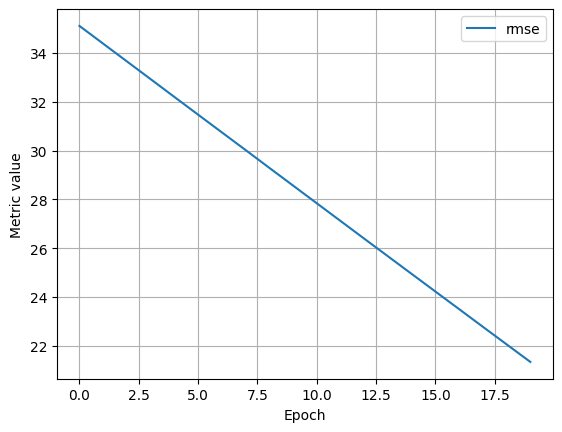

In [15]:
settings_2_b = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.0001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2_b, metrics)

experiment_2 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2_b)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

When the learning rate is too small, it may take longer for the loss curve to converge. With a small learning rate the loss curve decreases slowly, but does not show a dramatic drop or leveling off. With a small learning rate you could increase the number of epochs so that your model will eventually converge, but it will take longer.

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 777.3708 - rmse: 27.8814  
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 735.8726 - rmse: 27.1270
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 696.2894 - rmse: 26.3873
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 657.7133 - rmse: 25.6459
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 620.3712 - rmse: 24.9073
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 583.9323 - rmse: 24.1647
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 548.9982 - rmse: 23.4307
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514.7539 - rmse: 22.6882
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 481.9479 - rmse: 21.9533
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 450.3578 - rmse: 21.2216
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419.5494 - rmse: 20.4829
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390.0056 - rmse: 19.7486

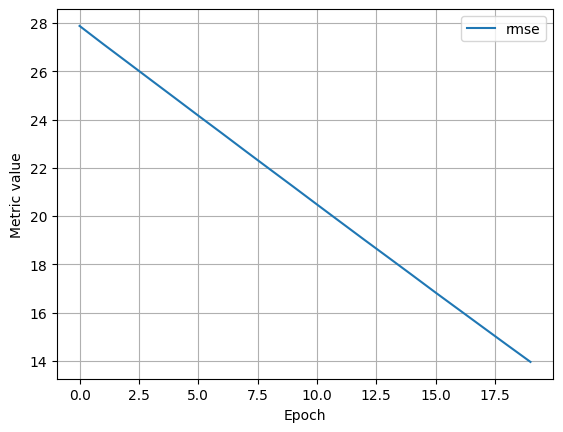

In [16]:
settings_2_a = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 500,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2_a, metrics)

experiment_2 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2_a)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

Increasing the batch size makes each epoch run faster, but as with the smaller learning rate, the model does not converge with just 20 epochs. If you have time, try increasing the number of epochs and eventually you should see the model converge.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1836.6473 - rmse: 42.8561
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 414.8261 - rmse: 20.3673
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.1973 - rmse: 5.2151
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.3481 - rmse: 3.9177
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.1297 - rmse: 3.6235
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5444 - rmse: 3.5418
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.3167 - rmse: 3.5095
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.2055 - rmse: 3.4936
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.1489 - rmse: 3.4855
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.1193 - rmse: 3.4813
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.1037 - rmse: 3.4790
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.0996 - rmse: 3.4

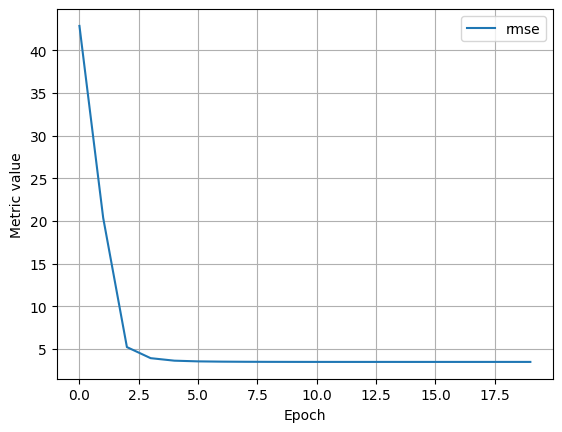

In [17]:
# Add in another input feature
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'FARE', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'FARE')

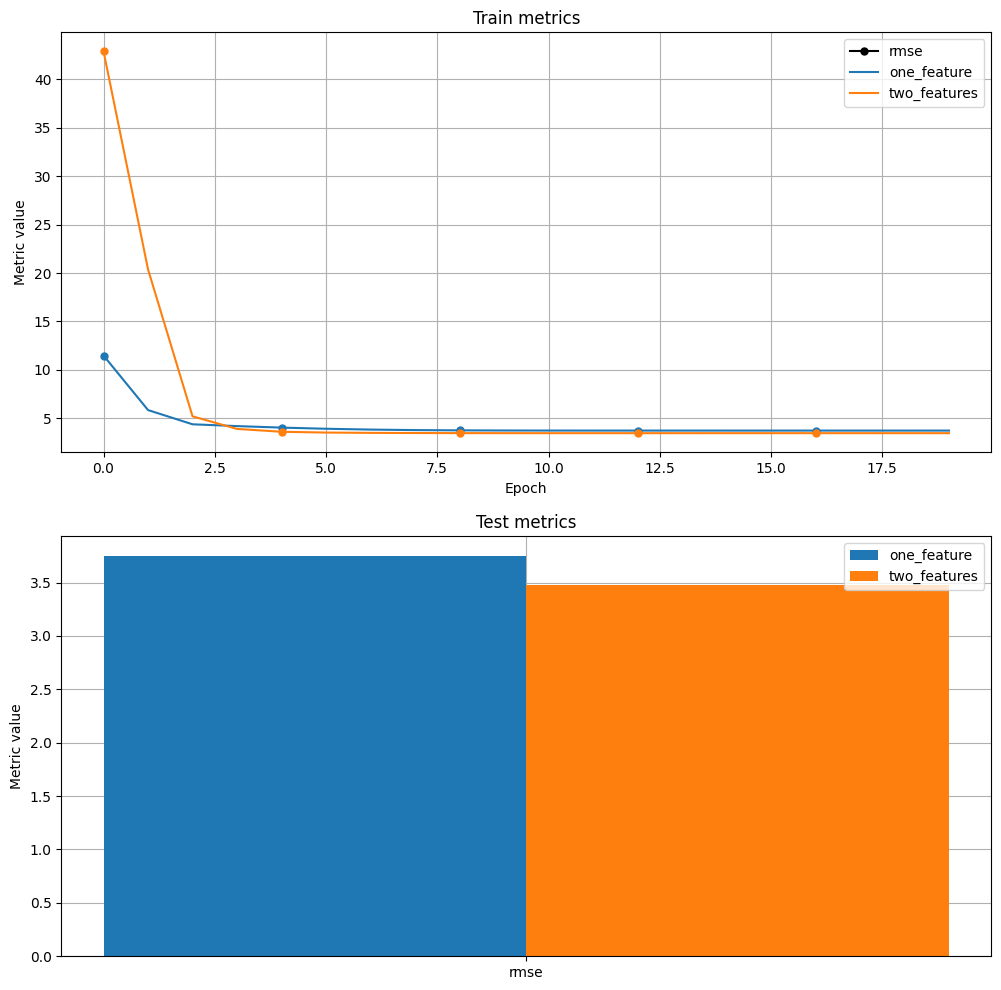

In [18]:
# Compare the experiments
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['FARE'].values)

In [24]:
# Define prediction functions
def format_currency(x):
    return '${:.2f}'.format(x)

def build_batch(df, batch_size):
    batch = df.sample(n = batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace = True)
    return batch

def predict_fare(model, df, features, label, batch_size = 50):
    batch = build_batch(df, batch_size)
    predicted_values = model.predict_on_batch(x = {name : batch[name].values for name in features})

    data = {'PREDICTED_FARE': [], 'OBSERVED_FARE': [], 'L1_LOSS': [],
            features[0]: [], features[1]: []}
    
    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]
        data['PREDICTED_FARE'].append(format_currency(predicted))
        data['OBSERVED_FARE'].append(format_currency(observed))
        data['L1_LOSS'].append(format_currency(abs(observed - predicted)))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append('{:.2f}'.format(batch.at[i, features[1]]))

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
    header = '-' * 80
    banner = header + '\n' + '|' + 'PREDICTIONS'.center(78) + '|\n' + header
    print(banner)
    print(output)
    return


In [25]:
# Make predictions
output = predict_fare(experiment_3.model, training_df, experiment_3.settings.input_features, 'FARE')
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0          $19.25        $19.25   $0.00        6.65        13.43
1           $7.38         $7.00   $0.38        1.22         7.47
2          $43.04        $43.50   $0.46       17.75        22.17
3          $24.74        $23.79   $0.95        8.16        30.33
4          $36.18        $35.50   $0.68       14.10        26.00
5          $46.39        $47.00   $0.61       19.01        27.73
6          $10.63        $10.79   $0.16        2.68         9.52
7          $46.46        $44.75   $1.71       17.76        45.92
8          $43.43        $44.75   $1.32       17.60        27.00
9          $11.70        $11.00   $0.70        3.10        11.00
10          $7.15         $6.75   $0.40   